# MBA FIAP Inteligência Artificial & Machine Learning

![Image of Dementia](img/ml.png)

## Programando IA com Python
## Projeto Final: Estimando Preços de Automóveis Utilizando Modelos de Regressão

Este projeto final tem como objetivo explorar os conhecimentos adquiridos nas aulas práticas. Por meio uma trilha guiada para construir um classificador que permitirá predizer o valor de um automóvel baseado em algumas características que cada grupo deverá escolher.

Este projeto poderá ser feita por grupos de até 4 pessoas.

| Nome dos Integrantes     | RM            | Turma |
| :----------------------- | :------------- | :-----: |
| Aneilson Benicio         | RM 331331      | `2IA` |
| Eduaro Kenji             | RM 331002      | `2IA` |
| Fernando                 | RM 331114      | `2IA` |

Por ser um projeto guiado, fique atento quando houver as marcações **Implementação** indica que é necessário realizar alguma implementação em Python no bloco a seguir onde há a inscrição ```##IMPLEMENTAR``` e **Resposta** indica que é esperado uma resposta objetiva relacionado a algum questionamento. 

**Cada grupo pode utilizar nas respostas objetivas quaisquer itens necessários que enriqueçam seu ponto vista, como gráficos, fotos e, até mesmo, trechos de código-fonte.**

Pode-se utilizar quantos blocos forem necessários para realizar determinadas implementações ou utilizá-las para justificar as respostas. Não é obrigatório utilizar somente o bloco indicado.

Ao final não se esqueça de subir os arquivos do projeto nas contas do GitHub de cada membro, ou subir na do representante do grupo e os membros realizarem o fork do projeto.

A avaliação terá mais ênfase nos seguintes tópicos de desenvolvimento do projeto:
 
1. __Exploração de Dados__
2. __Preparação de Dados__
3. __Desenvolvimento do Modelo__
4. __Treinamento e Teste do Modelo__
5. __Validação e Otimização do Modelo__
6. __Conclusões Finais__

## Exploração de Dados

Os dados que serão utilizados foram modificados para propocionar uma experiência que explore melhor as técnicas de processamento e preparação de dados aprendidas.

Originalmente os dados foram extraídos do Kaggle deste [dataset](https://www.kaggle.com/nisargpatel/automobiles/data).

**Implementação** 

Carregue o dataset "automobile-mod.csv" que se encontra na pasta "data" e faça uma inspeção nas 10 primeiras linhas para identificação básica dos atributos.

**O dataset original "automobile.csv" se encontra na mesma pasta apenas como referência. Não deverá ser utilizado.**

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

In [119]:
#IMPLEMENTAR
df_auto = pd.read_csv("data/automobile-mod.csv",sep=";")
df_auto.head(1000)


,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.00,111,5000.0,21.0,27.0,13495
1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.00,111,5000.0,21.0,27.0,16500
2,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.00,154,5000.0,19.0,26.0,16500
3,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.00,102,5500.0,24.0,30.0,13950
4,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.00,115,5500.0,18.0,22.0,17450
5,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,...,136,mpfi,3.19,3.40,8.50,110,5500.0,19.0,25.0,15250
6,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,...,136,mpfi,3.19,3.40,8.50,110,5500.0,19.0,25.0,17710
7,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,...,136,mpfi,3.19,3.40,8.50,110,5500.0,19.0,25.0,18920
8,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,...,131,mpfi,3.13,3.40,8.30,140,5500.0,17.0,20.0,23875
9,bmw,gas,std,two,sedan,rwd,front,101.2,176.8,64.8,...,108,mpfi,3.50,2.80,8.80,101,5800.0,23.0,29.0,16430


Relação das coluna e seu significado:

1. make: fabricante
2. fuel_type: tipo de combustível
3. aspiration: tipo de aspiração do motor, ex. turbo ou padrão (std)
4. body_style: estilo do carro, ex. sedan ou hatchback
5. drive_wheels: tração do carro, ex. rwd (tração traseira) ou frw (tração dianteira)
6. wheel_base: entre-eixos, distância entre o eixo dianteiro e o eixo traseiro
7. length: comprimento
8. width: largura
9. height: altura
10. curb_wheight: peso
11. engine_type: tipo do motor
12. number_of_cylinders: cilindrada, quantidade de cilindros
13. engine_size: tamanho do motor
14. fuel_system: sistema de injeção
15. bore: diâmetro do cilindro
16. stroke: diâmetro do pistão
17. compression_ratio: razão de compressão
18. horsepower: cavalo de força ou HP
19. peak_rpm: pico de RPM (rotações por minuto)
20. city_mpg: consumo em mpg (milhas por galão) na cidade
21. highway_mpg: consumo em mpg (milhas por galão) na estrada
22. price: preço (**Variável Alvo**)

### Correlacionamento dos atributos

Vamos utilizar algumas suposições e validar se elas são verdadeiras, por exemplo, o preço do carro pode variar com seu consumo, tamanho ou força? Vamos explorar estas hipósteses ou outras que o grupo julgue relevante.

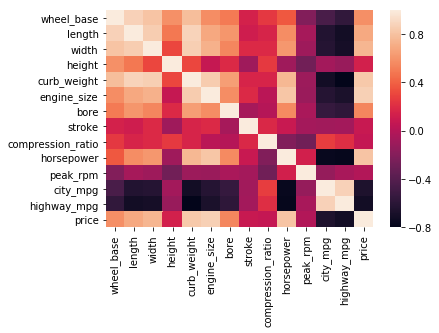

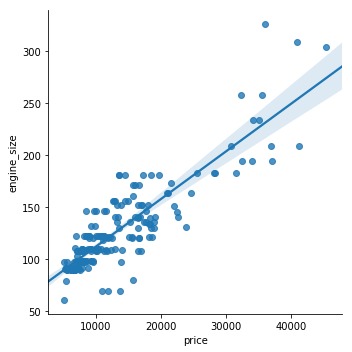

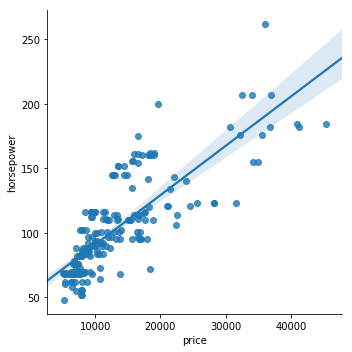

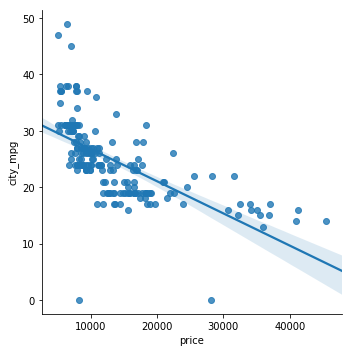

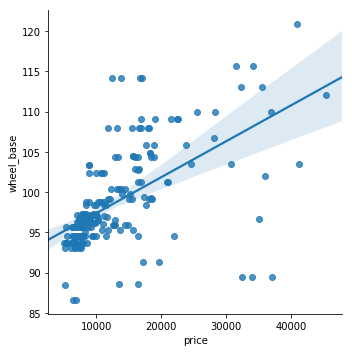

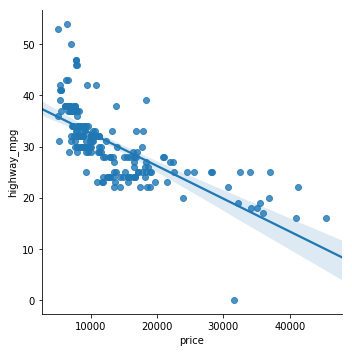

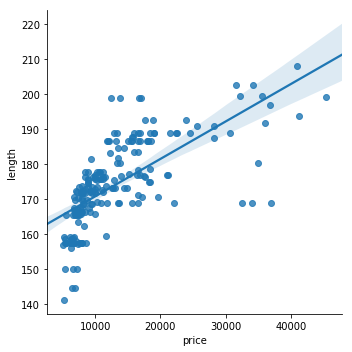

In [123]:
#IMPLEMENTAR
sns.heatmap(df_auto.corr())
sns.lmplot(data = df_auto ,y='engine_size',x='price' , order =1)
sns.lmplot(data = df_auto ,y='horsepower',x='price' , order =1)
sns.lmplot(data = df_auto ,y='city_mpg',x='price' , order =1)
sns.lmplot(data = df_auto ,y='wheel_base',x='price' , order =1)
sns.lmplot(data = df_auto ,y='highway_mpg',x='price' , order =1)
sns.lmplot(data = df_auto ,y='length',x='price' , order =1)




**Pergunta:** Cite um exemplo de pelo menos os 3 cenários propostos que corroboram a leitura dos dados apresentados, justique sua resposta.

**Resposta:**
wheel_base x length: Quanto maior o comprimento maior pode ser a distancia entre os eixos.
curb_weight x length: Quanto maior o comprimento maior o peso.
horsepower x engine_size: A potencia do carro está diretamente ligada ao tamanho do motor.

## Preparação dos Dados

### Identificação de Outliers Visualmente

Utilize visualizações gráficas para encontrar outliers em todos os atributos deste dataset.
Ainda não vamos remover ou atualizar os valores, por enquanto é uma análise exploratória.

Lembre-se que cada atributo possui um valor e dimensão diferente, portanto comparações devem estar em uma mesma base, por exemplo, __price__ não pode ser comparado com __width__ pois os eixos __y__ estarão sem proporção.

     horsepower  averageofconsume
17           48              50.0
30           76              34.5
29           58              51.5
33           76              32.0
32           76               NaN
31           60              40.0
26          102              27.0
117          68              34.5
23           68              34.5
24           68              34.5
25           68              34.5
20           68              39.0
76          102              27.0
116         102              27.0
22          102              27.0
115          68              39.0
21           68              34.5
74           68              34.5
75           68              34.5
73           68              39.0
18           70              40.5
19           70              40.5
0           111              24.0
1           111              24.0
134          69              33.5
135          73              28.5
118          68              34.5
119          68              34.5
186          9

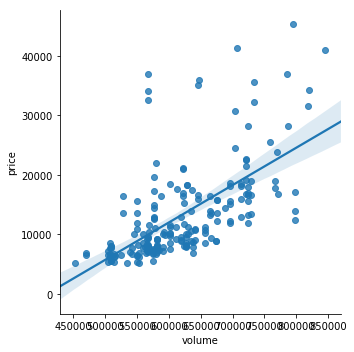

In [24]:
#IMPLEMENTAÇÃO
df_auto['volume'] =df_auto['length']*df_auto['width']*df_auto['height']
df_auto['averageofconsume'] = (df_auto['city_mpg']+df_auto['highway_mpg'])/2
df_auto = df_auto.sort_values(by=['volume'])
print(df_auto[['horsepower','averageofconsume']])
sns.lmplot(data = df_auto ,y='price',x='volume' , order =1)


Antes de explorar melhor as correlações, vamos analisar se há dados discrepante no conjunto de dados. Analisar os dados sem esta análise antes pode nos levar a algum viés indesejado.

### Análise de valores inválidos

Analise e busque por valores considerados nulos.

In [25]:
#IMPLEMENTAÇÃO
df_auto.isnull().any()


make                   False
fuel_type              False
aspiration             False
number_of_doors        False
body_style             False
drive_wheels           False
engine_location        False
wheel_base             False
length                 False
width                  False
height                 False
curb_weight            False
engine_type            False
number_of_cylinders    False
engine_size            False
fuel_system            False
bore                   False
stroke                 False
compression_ratio      False
horsepower             False
peak_rpm                True
city_mpg                True
highway_mpg             True
price                  False
volume                 False
averageofconsume        True
dtype: bool

Para os dados considerados nulos, realize a imputação de dados utilizando um valor apropriado (note que pode haver dados paramétricos e dados numéricos). Justique sua resposta.

In [26]:
#IMPLEMENTAÇÃO
df_auto[df_auto["peak_rpm"].isnull()]

,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,volume,averageofconsume
136,subaru,gas,std,two,hatchback,4wd,front,93.3,157.3,63.8,...,3.62,2.64,8.7,73,NaN,26.0,31.0,7603,558990.718,28.5
184,volkswagen,gas,std,four,sedan,fwd,front,97.3,171.7,65.5,...,3.19,3.40,10.0,100,NaN,26.0,32.0,9995,626421.695,29.0


In [27]:
#Pegando a media do peak_rpm para a marca subaru
#Substituimos os valores nulos pela média correspondente da mesma marca.  
df_auto_subaru = df_auto[df_auto["make"] == "subaru"]
df_auto_subaru = df_auto_subaru["peak_rpm"].replace(np.nan,df_auto_subaru["peak_rpm"].mean())
df_auto.update(df_auto_subaru)
df_auto[df_auto["make"] == "subaru"]

,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,volume,averageofconsume
134,subaru,gas,std,two,hatchback,fwd,front,93.7,156.9,63.4,...,3.62,2.36,9.0,69,4900.000000,31.0,36.0,5118,534178.602,33.5
135,subaru,gas,std,two,hatchback,fwd,front,93.7,157.9,63.6,...,3.62,2.64,8.7,73,4400.000000,26.0,31.0,7053,539279.028,28.5
136,subaru,gas,std,two,hatchback,4wd,front,93.3,157.3,63.8,...,3.62,2.64,8.7,73,4809.090909,26.0,31.0,7603,558990.718,28.5
139,subaru,gas,std,four,sedan,fwd,front,97.2,172.0,65.4,...,3.62,2.64,9.0,94,5200.000000,26.0,32.0,9960,590562.000,29.0
137,subaru,gas,std,four,sedan,fwd,front,97.2,172.0,65.4,...,3.62,2.64,9.5,82,4800.000000,32.0,37.0,7126,590562.000,34.5
138,subaru,gas,std,four,sedan,fwd,front,97.2,172.0,65.4,...,3.62,2.64,9.5,82,4400.000000,28.0,33.0,7775,590562.000,30.5
142,subaru,gas,std,four,wagon,fwd,front,97.0,173.5,65.4,...,3.62,2.64,9.0,82,4800.000000,28.0,32.0,7463,601385.700,30.0
143,subaru,gas,std,four,wagon,fwd,front,97.0,173.5,65.4,...,3.62,2.64,9.0,94,5200.000000,25.0,31.0,10198,601385.700,28.0
140,subaru,gas,std,four,sedan,4wd,front,97.0,172.0,65.4,...,3.62,2.64,9.0,82,4800.000000,24.0,25.0,9233,610809.840,24.5
141,subaru,gas,turbo,four,sedan,4wd,front,97.0,172.0,65.4,...,3.62,2.64,7.7,111,4800.000000,24.0,29.0,11259,610809.840,26.5


In [28]:
#pegando a media do peak_rpm para a marca volkswagen
#Substituimos os valores nulos pela média correspondente da mesma marca. 
df_auto_volkswagen = df_auto[df_auto["make"] == "volkswagen"]
df_auto_volkswagen = df_auto_volkswagen["peak_rpm"].replace(np.nan,df_auto_volkswagen["peak_rpm"].mean())
df_auto_volkswagen
df_auto.update(df_auto_volkswagen)
df_auto.loc[[184]]

,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,volume,averageofconsume
184,volkswagen,gas,std,four,sedan,fwd,front,97.3,171.7,65.5,...,3.19,3.4,10.0,100,5122.727273,26.0,32.0,9995,626421.695,29.0


In [29]:
#IMPLEMENTAÇÃO
df_auto[df_auto["city_mpg"].isnull()]

,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,volume,averageofconsume
36,honda,gas,std,two,hatchback,fwd,front,96.5,167.5,65.2,...,3.15,3.58,9.0,86,5800.0,NaN,33.0,7895,582089.3,NaN


In [30]:
#Pegando a media do city_mpg para a marca honda
#Substituimos os valores nulos pela média correspondente da mesma marca. 
df_auto_honda = df_auto[df_auto["make"] == "honda"]
df_auto_honda = df_auto_honda["city_mpg"].replace(np.nan,df_auto_honda["city_mpg"].mean())
df_auto.update(df_auto_honda)
df_auto[df_auto["make"] == "honda"]
df_auto.loc[[36]]

,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,volume,averageofconsume
36,honda,gas,std,two,hatchback,fwd,front,96.5,167.5,65.2,...,3.15,3.58,9.0,86,5800.0,30.666667,33.0,7895,582089.3,NaN


In [32]:
#IMPLEMENTAÇÃO
df_auto[df_auto["highway_mpg"].isnull()]

,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,volume,averageofconsume
32,honda,gas,std,two,hatchback,fwd,front,93.7,150.0,64.0,...,2.91,3.41,9.2,76,0.0,30.0,NaN,6529,504960.0,NaN


In [33]:
#Pegando a media do highway_mpg para a marca honda
#Substituimos os valores nulos pela média correspondente da mesma marca. 
df_auto_honda = df_auto[df_auto["make"] == "honda"]
df_auto_honda = df_auto_honda["highway_mpg"].replace(np.nan,df_auto_honda["highway_mpg"].mean())
df_auto.update(df_auto_honda)
df_auto[df_auto["make"] == "honda"]
df_auto.loc[[32]]

,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,volume,averageofconsume
32,honda,gas,std,two,hatchback,fwd,front,93.7,150.0,64.0,...,2.91,3.41,9.2,76,0.0,30.0,35.583333,6529,504960.0,NaN


In [34]:
#IMPLEMENTAÇÃO
df_auto[df_auto["averageofconsume"].isnull()]

,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,volume,averageofconsume
32,honda,gas,std,two,hatchback,fwd,front,93.7,150.0,64.0,...,2.91,3.41,9.2,76,0.0,30.000000,35.583333,6529,504960.0,NaN
36,honda,gas,std,two,hatchback,fwd,front,96.5,167.5,65.2,...,3.15,3.58,9.0,86,5800.0,30.666667,33.000000,7895,582089.3,NaN


In [35]:
#pegando a media do averageofconsume para a marca honda
#Substituimos os valores nulos pela média correspondente da mesma marca. 
df_auto_subaru = df_auto[df_auto["make"] == "honda"]
df_auto_subaru = df_auto_subaru["averageofconsume"].replace(np.nan,df_auto_subaru["averageofconsume"].mean())
df_auto.update(df_auto_subaru)
df_auto[df_auto["make"] == "honda"]

,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,volume,averageofconsume
30,honda,gas,std,two,hatchback,fwd,front,86.6,144.6,63.9,...,2.91,3.41,9.2,76,6000.0,31.000000,38.000000,6855,469388.952,34.500000
29,honda,gas,std,two,hatchback,fwd,front,86.6,144.6,63.9,...,2.91,3.41,9.6,58,4800.0,49.000000,54.000000,6479,469388.952,51.500000
33,honda,gas,std,two,hatchback,fwd,front,93.7,150.0,64.0,...,2.91,3.41,9.2,76,6000.0,30.000000,34.000000,7129,504960.000,32.000000
32,honda,gas,std,two,hatchback,fwd,front,93.7,150.0,64.0,...,2.91,3.41,9.2,76,0.0,30.000000,35.583333,6529,504960.000,33.272727
31,honda,gas,std,two,hatchback,fwd,front,93.7,150.0,64.0,...,2.91,3.07,10.1,60,5500.0,38.000000,42.000000,5399,504960.000,40.000000
41,honda,gas,std,two,sedan,fwd,front,96.5,169.1,66.0,...,3.15,3.58,9.1,100,5500.0,25.000000,31.000000,10345,569190.600,28.000000
34,honda,gas,std,four,sedan,fwd,front,96.5,163.4,64.0,...,2.91,3.41,9.2,76,6000.0,30.000000,34.000000,7295,569939.200,32.000000
37,honda,gas,std,two,hatchback,fwd,front,96.5,167.5,65.2,...,3.15,3.58,9.0,86,5800.0,27.000000,33.000000,9095,582089.300,30.000000
36,honda,gas,std,two,hatchback,fwd,front,96.5,167.5,65.2,...,3.15,3.58,9.0,86,5800.0,30.666667,33.000000,7895,582089.300,33.272727
35,honda,gas,std,four,wagon,fwd,front,96.5,157.1,63.9,...,2.92,3.41,9.2,76,0.0,30.000000,34.000000,7295,585255.627,32.000000


### Análise de valores com valores iguais a 0

Analise se no conjunto de dados há valores iguais a 0 e verifique se faz parte do contexto. Caso não faça parte do contexto, utilize alguma técnica de imputação de dados apropriada.

Inspecione o dataset por dados iguais a 0.

In [36]:
#IMPLEMENTAÇÃO
(df_auto == 0).any()

make                   False
fuel_type              False
aspiration             False
number_of_doors        False
body_style             False
drive_wheels           False
engine_location        False
wheel_base             False
length                 False
width                  False
height                 False
curb_weight            False
engine_type            False
number_of_cylinders    False
engine_size            False
fuel_system            False
bore                   False
stroke                 False
compression_ratio      False
horsepower             False
peak_rpm                True
city_mpg                True
highway_mpg             True
price                  False
volume                 False
averageofconsume       False
dtype: bool

A imputação de dados pode seguir algum padrão dos demais exemplos ou pode ser simplesmente atribuído um valor. Avalie tais condições de acordo com as inspeções de dados.

In [38]:
#IMPLEMENTAÇÃO
#Utilizamos mesma estratégia anterior para os demais atributos. Media por marca correspondente
#pegando a media do peak_rpm para a marca honda
#Substituimos os valores pela média correspondente da mesma marca. 
df_auto_honda = df_auto[df_auto["make"] == "honda"]
df_auto_honda = df_auto_honda["peak_rpm"].replace(0,df_auto_honda["peak_rpm"].mean())
df_auto_honda
df_auto.update(df_auto_honda)
df_auto[df_auto["peak_rpm"]==0]


,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,volume,averageofconsume


In [40]:
#IMPLEMENTAÇÃO
#Utilizamos mesma estratégia anterior para os demais atributos. Media por marca correspondente
#pegando a media do city_mpg para a marca volkswagen
#Substituimos os valores pela média correspondente da mesma marca.
df_auto_volkswagen = df_auto[df_auto["make"] == "volkswagen"]
df_auto_volkswagen = df_auto_volkswagen["city_mpg"].replace(0,df_auto_volkswagen["city_mpg"].mean())
df_auto_volkswagen
df_auto.update(df_auto_volkswagen)
df_auto[df_auto["city_mpg"]==0]


,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,volume,averageofconsume
66,mercedes-benz,diesel,turbo,two,hardtop,rwd,front,106.7,187.5,70.3,...,3.58,3.64,21.5,123,4350.0,0.0,25.0,28176,723650.625,12.5


In [41]:
#IMPLEMENTAÇÃO
#Utilizamos mesma estratégia anterior para os demais atributos. Media por marca correspondente
#pegando a media do city_mpg para a marca mercedes-benz
#Substituimos os valores pela média correspondente da mesma marca.
df_auto_mercedes_benz = df_auto[df_auto["make"] == "mercedes-benz"]
df_auto_mercedes_benz = df_auto_mercedes_benz["city_mpg"].replace(0,df_auto_mercedes_benz["city_mpg"].mean())
df_auto_mercedes_benz
df_auto.update(df_auto_mercedes_benz)
df_auto[df_auto["city_mpg"]==0]

,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,volume,averageofconsume


In [42]:
#IMPLEMENTAÇÃO
#Utilizamos mesma estratégia anterior para os demais atributos. Media por marca correspondente
#pegando a media do highway_mpg para a marca mercedes-benz
#Substituimos os valores pela média correspondente da mesma marca.
df_auto_mercedes_benz = df_auto[df_auto["make"] == "mercedes-benz"]
df_auto_mercedes_benz = df_auto_mercedes_benz["highway_mpg"].replace(0,df_auto_mercedes_benz["highway_mpg"].mean())
df_auto_mercedes_benz
df_auto.update(df_auto_mercedes_benz)
df_auto[df_auto["highway_mpg"]==0]

,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,volume,averageofconsume


In [43]:
#IMPLEMENTAÇÃO
#Confirmação da substituição
(df_auto == 0).any()

make                   False
fuel_type              False
aspiration             False
number_of_doors        False
body_style             False
drive_wheels           False
engine_location        False
wheel_base             False
length                 False
width                  False
height                 False
curb_weight            False
engine_type            False
number_of_cylinders    False
engine_size            False
fuel_system            False
bore                   False
stroke                 False
compression_ratio      False
horsepower             False
peak_rpm               False
city_mpg               False
highway_mpg            False
price                  False
volume                 False
averageofconsume       False
dtype: bool

### Análise Numérica de Outliers

Da análise visual de outliers realizada acima vamos utilizar uma métrica de verificação mais apropriada e objetiva afim de criar um patamar aceitável de dados não discrepantes.

Neste projeto vamos considerar [o Método Turco para identificar discrepantes](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/), que utiliza um __passo de limite__ que é 5 vezes (em nosso projeto) a diferença entre o terceiro (Q3) e o primeiro quartil (Q1). Deste modo, valores que sejam maiores que o Q3 + passo de limite ou menor Q2 - passo de limite sejam sinalizados como outliers.

Construa uma função que receba como parâmetro de entrada um série de dados e exiba os valores discrepantes. Utilize o boilerplate abaixo para completar as instruções faltantes.

*Dica: utilize a função do Numpy de percentil, np.percentile(serie, 25) para quartil 1 e np.percentile(serie, 75) para quartil 3.*

compression_ratio
horsepower
price
18.0 186.0 24275.0


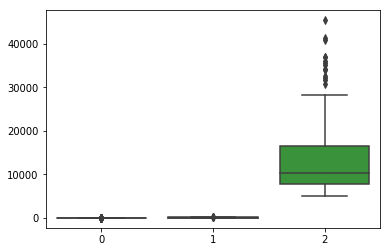

In [126]:
def identificacao_outlier(df,column_name):
    print(column_name)
    q1 = np.percentile(df[column_name], 25)
    q3=  np.percentile(df[column_name], 75)
    iqr = q3 - q1
    outlier_lower = q1 - (iqr * 1.5)
    outlier_upper = q3 + (iqr * 1.5)
    return (outlier_upper + outlier_lower)


comp  = identificacao_outlier(df_auto,'compression_ratio')
horse = identificacao_outlier(df_auto,'horsepower')
price   = identificacao_outlier(df_auto,'price')

print(comp, horse, price)

sns.boxplot(data=[df_auto["compression_ratio"],df_auto["horsepower"],df_auto["price"]])


**Pergunta:** Houve dados discrepantes localizados pela metodologia sugerida? Quais foram os atributos discretpantes e quais as hipótese de serem discrepantes? Qual foi a sua conclusão, são realmente dados que devem ser removidos ou mantidos? Justifique.

**Resposta:**
Comparando o gráfico de boxplot com o método aplicado percebmos sugestões nos valores de outlier. 


### Mapeamento de Dados Paramétricos

Os algoritmos de aprendizado de máquina precisam receber dados que sejam inteiramente numéricos. Dados que representam uma classificação como por exemplo um tipo de carro, como sedan ou hatchback, deve ser convertido em um valor numérico associado, como por exemplo 1 ou 2.

Crie uma função que receba uma lista única e retorne um dicionário com a categoria e um código numérico crescente e incremental para posteriormente utilizarmos como mapeamento.

In [45]:
#IMPLEMENTAÇÃO

def mapear_serie(serie):
    dict_gen = {}
    uniquedataframe = sorted(serie.unique())
    dict_gen = dict(zip(range(1,len(uniquedataframe)+1),uniquedataframe))
    return  dict(zip(dict_gen.values(), dict_gen.keys()))



Com a funcão criada, crie dicionários para cada coluna paramétrica. Lembre-se que é necessário passar somente valores únicos.

*Dica: utilize a função unique() do dataframe para obter valores únicos de uma determinada série (ou coluna).*

In [46]:
# IMPLEMENTAÇÃO 
dicnumber_of_doors= mapear_serie(df_auto['number_of_doors'])
dicbody_style= mapear_serie(df_auto['body_style'])
dicdrive_wheels= mapear_serie(df_auto['drive_wheels'])
dicmake= mapear_serie(df_auto['make'])
dicaspiration= mapear_serie(df_auto['aspiration'])
dicfuel_type= mapear_serie(df_auto['fuel_type'])
dicengine_location= mapear_serie(df_auto['engine_location'])
dicfuel_system=mapear_serie(df_auto['fuel_system'])

Até este momento seu conjunto de dados não deve conter nenhum dado paramétrico. Todos os dados armazenados com valores como texto, por exemplo, "diese", "gas" deve estar preenchido com valores numéricos, como 1 ou 2.

Inspecione seus dados e certifique de que tudo está certo.

*Dica: utilize uma inspeção simples visual, com 20 amostras.*

In [47]:
#IMPLEMENTAÇÃO
df_auto['number_of_doors'].replace(dicnumber_of_doors, inplace=True)
df_auto['body_style'].replace(dicbody_style, inplace=True)
df_auto['drive_wheels'].replace(dicdrive_wheels, inplace=True)
df_auto['make'].replace(dicmake, inplace=True)
df_auto['aspiration'].replace(dicaspiration, inplace=True)
df_auto['fuel_type'].replace(dicfuel_type, inplace=True)
df_auto['engine_location'].replace(dicengine_location, inplace=True)
df_auto['fuel_system'].replace(dicfuel_system, inplace=True)

df_auto.head(20)

,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,volume,averageofconsume
17,4,2,1,2,3,2,1,88.4,141.1,60.3,...,2.91,3.03,9.50,48,5100.000000,47.0,53.000000,5151,452643.156,50.000000
30,6,2,1,2,3,2,1,86.6,144.6,63.9,...,2.91,3.41,9.20,76,6000.000000,31.0,38.000000,6855,469388.952,34.500000
29,6,2,1,2,3,2,1,86.6,144.6,63.9,...,2.91,3.41,9.60,58,4800.000000,49.0,54.000000,6479,469388.952,51.500000
33,6,2,1,2,3,2,1,93.7,150.0,64.0,...,2.91,3.41,9.20,76,6000.000000,30.0,34.000000,7129,504960.000,32.000000
32,6,2,1,2,3,2,1,93.7,150.0,64.0,...,2.91,3.41,9.20,76,4830.769231,30.0,35.583333,6529,504960.000,33.272727
31,6,2,1,2,3,2,1,93.7,150.0,64.0,...,2.91,3.07,10.10,60,5500.000000,38.0,42.000000,5399,504960.000,40.000000
26,5,2,2,2,4,2,1,93.7,157.3,63.8,...,3.03,3.39,7.60,102,5500.000000,24.0,30.000000,8558,507808.444,27.000000
117,15,2,1,1,3,2,1,93.7,157.3,63.8,...,2.97,3.23,9.40,68,5500.000000,31.0,38.000000,6229,507808.444,34.500000
23,5,2,1,1,3,2,1,93.7,157.3,63.8,...,2.97,3.23,9.40,68,5500.000000,31.0,38.000000,6229,507808.444,34.500000
24,5,2,1,1,4,2,1,93.7,157.3,63.8,...,2.97,3.23,9.40,68,5500.000000,31.0,38.000000,6692,507808.444,34.500000


## Desenvolvimento do Modelo

O conjunto de dados que temos a nossa disposição indica a aplicação de um modelo voltado a regressão, ou seja, queremos prever um preço de um veículo dada certas condições. É um problema típico de predição de série numérica.

Podemos aplicar quaisquer algoritmos de regressão existente que tenha aplicação de classificação, pois é de um domínio diferente.

Iremos explorar 3 modelos de algoritmos de regressão para testar a performance de cada um deles. Ao final será eleito o que apresentar melhor performance de pontuação R2.

Os algoritmos são:

1. [Regressão Linear](http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html)
2. [Regressão de Árvore de Decisão](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)
3. [Regressão Ridge](http://scikit-learn.org/stable/modules/linear_model.html#ridge-regression)

**Pergunta:** Explique como cada modelo de regressão funciona, indicando pelo menos um caso de uso em cada um deles.

**Resposta:** 

**Regressão linear:** É uma abordagem supervisionada simples. Assume uma dependência linear entre a variável resposta 𝑌 e os valores 𝑋1,𝑋2,…,𝑋𝑝. 
Como caso de uso podemos citar uma relação entre aumento de vendas e propanda.

**Regressão de Árvore de Decisão:** Uma árvore de regressão é idêntica a uma árvore de decisão porque também é formada por um conjunto de nós de decisão, perguntas, mas o resultado, em vez de uma categoria, é um escalar (número que pertence a uma escala).
Como caso de uso podemos citar predição do preço de mercado de outros apartamentos por uma árvore de regressão

**Regressão Ridge:** Podemos utilizar essa regressão para regularizar um modelo de regressão polinomial.




Antes de partimos para o treinamento do modelo, precisaremos separar os dados em subconjuntos para permitir avaliar adequadamente o modelo.

Uma boa razão de tamanho de conjunto de treinamento e testes é 80% e 20% ou ainda, 70% e 30%. O importante é não misturar dados de treinamento com os de teste para termos uma ideia melhor sobre a performance do modelo com dados previametne não treinados.

Antes de separarmos os dados, a partir das análises realizadas anteriormente, quais seriam os atributos a serem utilizados e por qual motivo. Informe também qual seria o atributo preditor?

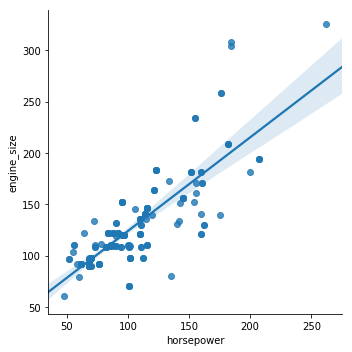

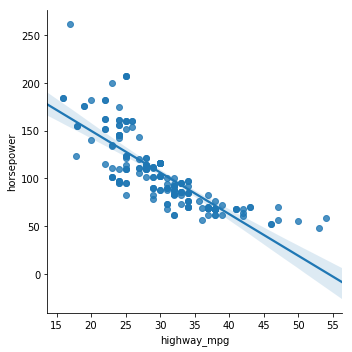

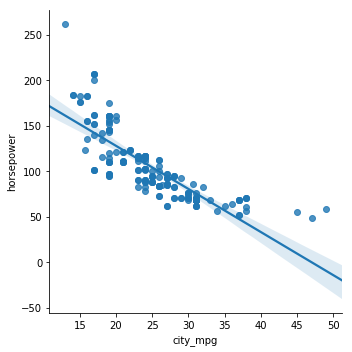

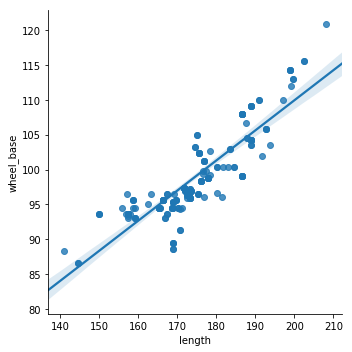

In [104]:
#IMPLEMENTAÇÃO
sns.lmplot(data = df_auto ,y='engine_size',x='horsepower' , order =1)
sns.lmplot(data = df_auto ,y='horsepower',x='highway_mpg' , order =1)
sns.lmplot(data = df_auto ,y='horsepower',x='city_mpg' , order =1)
sns.lmplot(data = df_auto ,y='wheel_base',x='length' , order =1)


Crie subsets de treinamento e teste utilizado uma razão adequada de tamanho.
Utilze o ```train_test_split``` passando como parâmetros

In [48]:
from sklearn.model_selection import train_test_split

#IMPLEMENTAÇÃO

def SplitSubset(df, column_namePredict, feature_col_names):
    x = df[feature_col_names].values
    y = df[column_namePredict].values
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
   
    return x_train, x_test, y_train, y_test


Inspecione cada subconjunto de dados obtidos do ```train_test_split```. Note que nos conjuntos X devemos ter atributos, logo é esperado uma matriz com mais de uma coluna. Nos conjuntos y, é a classe de predição, logo é esperado apenas um atributo.

In [105]:
#IMPLEMENTAÇÃO
#Inspeção de X_train
Cityfeature_col_names = [ 'highway_mpg','city_mpg', 'length','compression_ratio','engine_size','horsepower']
x_train, x_test, y_train, y_test = SplitSubset(df_auto,'price',Cityfeature_col_names)
print(x_train)


[[ 30.          24.         176.2          9.3        146.
  116.        ]
 [ 24.          19.         186.7          8.4        120.
   95.        ]
 [ 41.          37.         157.3          9.4         92.
   68.        ]
 [ 24.          19.         187.8          9.2        161.
  156.        ]
 [ 33.          27.         175.4          9.         110.
   86.        ]
 [ 36.          34.         166.3         22.5        110.
   56.        ]
 [ 25.          20.         189.           9.         164.
  121.        ]
 [ 25.          17.         168.9          9.5        194.
  207.        ]
 [ 33.          30.66666667 167.5          9.         110.
   86.        ]
 [ 24.          19.         183.5          9.3        171.
  161.        ]
 [ 37.          32.         172.           9.5        108.
   82.        ]
 [ 18.          16.         180.3          8.3        234.
  155.        ]
 [ 25.          19.         178.5          9.         181.
  160.        ]
 [ 32.          26.      

In [106]:
#IMPLEMENTAÇÃO
#Inspeção de Y_train

Cityfeature_col_names = [ 'highway_mpg','city_mpg', 'length','compression_ratio','engine_size','horsepower']
x_train, x_test, y_train, y_test = SplitSubset(df_auto,'price',Cityfeature_col_names)
print(y_train)



[11199 15580  5389 15750 10295  7898 24565 32528  7895 15998  7126 35056
 18399 11245  9960 21105  7957  7609 10245 25552  8358 16558 17075 12945
  7499  6479 11595 10898 31600  7799  7609 45400 14869 13860 11900 28176
 11248  9895 20970 11850 16695 34028  5151  9639 16430  9989  6649 15985
  9959 19699 37028  7198  9095  7957 15510 16500 32250 10698  6295  5572
  6695 17669  6938 10198 22018  7129  7775 30760 34184  8558 17199  6989
  7975 13499 21485 14399  7775 40960  5572  9495  9233 10945  9538  7099
  6855  8495 12170  7603  8949  6918 22625  6189  5195  8778  7738 18620
  8845 11845  9980  8013  8921  6488 18420 13950 17950 15645 10795 18150
 16503  6338  7463  8189  7349 15250 13499 28248 12764  7395  7053 41315
  9279 18920 22470 23875  6095  8058 36000 16500 14489  7295  8249  6575
  6692 11259 12440  6849 36880  7995  9258 16845]


Verifique também se a razão dos conjuntos está coerente com a divisão estabelecida. Para estes cálculos divia o número de itens do conjunto de treino pelo total e também o de testes pelo total.

In [107]:
#IMPLEMENTAÇÃO
Cityfeature_col_names = [ 'highway_mpg','city_mpg', 'length','compression_ratio','engine_size','horsepower']
x_train, x_test, y_train, y_test = SplitSubset(df_auto,'price',Cityfeature_col_names)
fl = float(len(x_train))/float(len(df_auto))
fl2 = float(len(x_test))/float(len(df_auto))
 
print(fl ,' TRAIN' ,fl2, ' TEST')


0.6965174129353234  TRAIN 0.3034825870646766  TEST


## Treinamento e teste do modelo

Após separarmos os dados adequadamente, selecionar os atributos que irão compor como o modelo deve treinar e qual atributo deve perseguir, o próximo passo é treinar este modelo e verificar, pelos testes, sua performance.

Este estudo também irá levar a escolhermos qual algoritmo devemos utilizar dentre os três selecionados neste ajuste.

Para avaliarmos a performance dos modelos, vamos criar uma função que determinará a pontuação R2.

Não esqueça de avaliar os conjuntos de dados de treino (```X_train```, ```y_train``` e de teste, ```X_test``` e ```y_test```)

In [108]:
from sklearn.metrics import mean_squared_error, r2_score

def pontuacao(modelo, X_test, y_test):
    y_pred = modelo.predict(X_test)
    print("%s R2 score: %.2f" %(modelo,r2_score(y_test, y_pred)))

### Regressão Linear

Utilize para a variável preditora a função ```.ravel()``` para converter os dados no formato que o ```sklearn``` espera.

In [109]:
from sklearn import linear_model

lr_model = linear_model.LinearRegression()

#IMPLEMENTAÇÃO

def linearModel(x_train, x_test, y_train, y_test ):
    lr_model = linear_model.LinearRegression()
    lr_model.fit(np.array(x_train), np.array(y_train).ravel())
    y_pred = lr_model.predict(x_test)
    print('Score linearModel: %.2f' % r2_score(y_test, y_pred))
    print('Score linearModel: %.2f' % lr_model.score(x_test, y_test))
    return  lr_model.score(x_test, y_test),'LINEAR'

Obténha a pontuação R2, utilizando a função ```pontuacao``` para os conjuntos de treino e de teste.

In [110]:
#IMPLEMENTAÇÃO


score,name = linearModel(x_train, x_test, y_train, y_test)
print(score,name )

Score linearModel: 0.71
Score linearModel: 0.71
0.7052925540652027 LINEAR


### Regressão de árvore de Decisão

In [111]:
from sklearn import tree

dtr_model = tree.DecisionTreeRegressor()

#IMPLEMENTAÇÃO
def decisionTree( x_train, x_test, y_train, y_test):
    lr_model = tree.DecisionTreeRegressor()
    lr_model.fit(np.array(x_train), np.array(y_train).ravel())
    y_pred = lr_model.predict(x_test)
    print('Score decisionTree: %.2f' % r2_score(y_test, y_pred))
    print('Score decisionTree: %.2f' % lr_model.score(x_test, y_test))
    return  lr_model.score(x_test, y_test),'TREE'



Obténha a pontuação R2, utilizando a função ```pontuacao``` para os conjuntos de treino e de teste.

In [112]:
#IMPLEMENTAÇÃO

score,name = decisionTree(x_train, x_test, y_train, y_test)
print(score,name )

Score decisionTree: 0.78
Score decisionTree: 0.78
0.7794578824578 TREE


### Regressão Ridge

In [113]:

lr_model = linear_model.Ridge()

#IMPLEMENTAÇÃO

def linearRidge(x_train, x_test, y_train, y_test ):
    lr_model = linear_model.Ridge()
    lr_model.fit(np.array(x_train), np.array(y_train).ravel())
    y_pred = lr_model.predict(x_test)
    print('Score linearModel: %.2f' % r2_score(y_test, y_pred))
    print('Score linearModel: %.2f' % lr_model.score(x_test, y_test))
    return  lr_model.score(x_test, y_test),'Ridge'
    


Obténha a pontuação R2, utilizando a função ```pontuacao``` para os conjuntos de treino e de teste.

In [114]:
#IMPLEMENTAÇÃO

score,name = linearRidge(x_train, x_test, y_train, y_test)
print(score,name )


Score linearModel: 0.71
Score linearModel: 0.71
0.7052742330451147 Ridge


**Pergunta:** Nesta análise preliminar, como foi a performance de cada algoritmo? Explique os resultados e detalhe como a característica de cada algoritmo influenciou no resultado.

**Resposta:** Analisando o resultado de cada algorítimo percebemos que a regressão por árvore de descição apresentou o melhor desempenho e resultado.
Os demais algorítmos apresentaram comportamentos semelhantes dentro de suas particularidades gerando valores liarmente independentes.

## Validação e Otimização do Modelo

Cada algoritmo de modelo pode oferecer a possibilidade de ajustes de seus parâmetros. Tais ajustes podem contribuir para melhorar ou piorar o modelo, portanto esta fase de otimização e validação é importante entender o patamar de partida, com os valores padrões obtidos nos passos anteriores versus as otimizações.

É comum que as otimizações não sejam capazes de alterar os patamares padrão.

O Scikit Learn oferece uma forma simplificada de testar diversas condições de parâmetros diferentes por meio do ```GridSearchCV```. Após diversos testes é apresentado os parâmetros que obtiveram os melhores resultados.

### Regulação dos parâmetros dos modelos

Analise os parâmetros possíveis de cada algortimo de regressão e crie um dicionário para ser utilizado no ```GridSearchCV```.
O dicionário é composto pelo nome do parâmetro como chave. Seu valor será uma lista de valores que se deseja otimizar. Não deixe de revisar a [documentação](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

Verfique a pontuação R2 para os conjuntos de dados de treino e de teste, pois nem sempre preditores que se saem bem durante o treinamento terão a mesma performance com os dados de teste.

### Regulação do Modelo de Regressão Linear

Escolha quais atributos incluir na variável ```parameters```para serem otimizados. Essa variável é um dicionário onde cada chave representa uma configuração do modelo, o valor pode ser único ou uma lista, neste caso utilize ```[]``` para incluir múltiplos valores. Como nosso problema é relacionado a regressão, utilize a pontuação R2 em ```scoring``` na configuração do ```GridSearchCV```. 

In [115]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

def calculateGridCV(X, Y):
    parameters = {}
    model = linear_model.LinearRegression()
    parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
    grid = GridSearchCV(model,parameters, cv=None, scoring='r2')
    grid.fit(X, Y.ravel())
    return grid.score(X, Y),grid.best_estimator_

Calcule as pontuações para o melhor estimador com dados de treino.

In [116]:
calculateGridCV(x_train, y_train)

(0.8239814920301501,
 LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=True))

E também para os dados de testes.

In [117]:
calculateGridCV(x_test, y_test)

(0.7816688084021621,
 LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=True))

### Regulação do Modelo de Regressão de Árvore de Decisão

In [118]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

def calculateGridCVTree(X, Y):
    parameters = {}
    model = tree.DecisionTreeRegressor()
    parameters = {
              "min_samples_split": [2, 10, 20],
              "max_depth": [None, 2, 5, 10],
              "min_samples_leaf": [1, 5, 10],
              "max_leaf_nodes": [None, 5, 10, 20],
              }
    grid = GridSearchCV(model,parameters, cv=None, scoring='r2')
    grid.fit(X, Y.ravel())
    return grid.score(X, Y),grid.best_estimator_

Pontuação dos dados de treino.

In [102]:
#IMPLEMENTAÇÃO
calculateGridCVTree(x_train, y_train)


(0.9205534068812494,
 DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=20, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'))

Pontuação dos dados de teste.

In [66]:
# IMPLEMENTAÇÃO

calculateGridCVTree(x_test, y_test)

(0.9637622752722609,
 DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
            max_leaf_nodes=20, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'))

### Regulação do Modelo de Regressão Ridge

In [67]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

def calculateGridCVRidge(X, Y):
    parameters = {}
    model =  linear_model.Ridge()
    parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
    grid = GridSearchCV(model,parameters, cv=None, scoring='r2')
    grid.fit(X, Y.ravel())
    return grid.score(X, Y),grid.best_estimator_

Pontuação dos dados de treino.

In [68]:
#IMPLEMENTAÇÃO
calculateGridCVRidge(x_train, y_train)


(0.8281773909143021,
 Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
    normalize=False, random_state=None, solver='auto', tol=0.001))

Pontuação dos dados de teste.

In [69]:
#IMPLEMENTAÇÃO

calculateGridCVRidge(x_test, y_test)

(0.7353516511537671,
 Ridge(alpha=1.0, copy_X=True, fit_intercept=False, max_iter=None,
    normalize=True, random_state=None, solver='auto', tol=0.001))

In [70]:
linearTest,_ =   (calculateGridCV(x_test, y_test))
treeTest,_ =     (calculateGridCVTree(x_test, y_test))
RidgeTest,_ =    (calculateGridCVRidge(x_test, y_test))

linearTrain,_ =   (calculateGridCV(x_train, y_train))
treeTrain,_ =  ( calculateGridCVTree(x_train, y_train))
RidgeTrain,_ =  (calculateGridCVRidge(x_train, y_train))
 
print("| | Regressão linear | Regressão árvore de decisão | Regressão ridge | |:---------------------|:------------------:|:-----------------------------:|:-----------------:| | R2 treino |"+str(linearTrain)+"|"+str(treeTrain) +"|"+str( RidgeTrain) +"| | R2 teste |"+str(linearTest) +"|" + str(treeTest) +"|" +str(RidgeTest) +"|"   )

 


| | Regressão linear | Regressão árvore de decisão | Regressão ridge | |:---------------------|:------------------:|:-----------------------------:|:-----------------:| | R2 treino |0.8198625145079753|0.9205534068812494|0.8281773909143021| | R2 teste |0.7362158960578167|0.9759960573625824|0.7353516511537671|


Sumarize na tabela abaixo os indicadores para cada um dos preditores e suas respectivas pontuações para os conjuntos de dados de treino e de testes


| | Regressão linear | Regressão árvore de decisão | Regressão ridge | |:---------------------|:------------------:|:-----------------------------:|:-----------------:| | R2 treino |0.8193221544761535|0.9687378395485391|0.8192864226880789| | R2 teste |0.7360733497855164|0.9637622752722609|0.7354265361817907|

**Pergunta:** Qual dos algoritmos de regressão obteve os melhores resultados? Quais caracaterísticas deste algoritmo podem ajudar a justificar tal resultado?

**Resposta:** 
O melhor algorítimo para obeter o melhor score é a  regressão por árvore de descição. Uma vez que faz uma busca dentro de seus nós.

### Implementação do algoritmo otimizado

Configure o classificador selecionado com os parâmetros otimizados obtidos anteriormente.

In [103]:
#IMPLEMENTAÇÃO
 
    
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

def calculateGridCVTreeWithParam(X, Y, parameters):
    parameters = {}
    model = tree.DecisionTreeRegressor()
    grid = GridSearchCV(model,parameters, cv=None, scoring='r2')
    grid.fit(X, Y.ravel())
    return grid.score(X, Y),grid.best_estimator_

parameters = {
       "criterion":'mse', 
        "max_depth":None,
        "max_features":None,
        "max_leaf_nodes":None,
        "min_impurity_decrease":0.0,
        "min_impurity_split":None, 
        "min_samples_leaf":1,
        "min_samples_split":20, 
        "splitter":'best',
        "min_weight_fraction_leaf":0.0,
        "presort":False,
        "random_state":None
          }
    
treeTest =     (calculateGridCVTreeWithParam(x_test, y_test,parameters))
 
treeTrain =  ( calculateGridCVTreeWithParam(x_train, y_train,parameters))
print(treeTest,treeTrain)
 


(0.9759960573625824, DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')) (0.9802695902073562, DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'))


### Teste com exemplos

Utilize 3 exemplos criados por você mesmo para obter um valor de venda de veículo. Escolha caracaterísticas que demonstrem como o regressor deveria se comportar. Para tanto, imagine exemplos dos quais você espera um valor baixo, mediano e alto do preço do veículo baseado nos atributos escolhidos

In [120]:
#Lembre-se que os atributos são os armazenados na lista feature_col_names
feature_col_names =['highway_mpg','city_mpg', 'length','compression_ratio','engine_size','horsepower']

In [121]:
#IMPLEMENTAÇÃO
#A entrada de dados deve ser uma matriz do seguinte formato, note que há dois colchetes pois é uma 
#matriz dentro de outra matriz [[a,b,c,d,e]]

def linearModel_General(x_train, y_train, predict ):
    lr_model = linear_model.LinearRegression()
    lr_model.fit(np.array(x_train), np.array(y_train).ravel())
    y_pred = lr_model.predict(predict)
    print(y_pred,'linearModel_General')
def linearRidge_General(x_train, y_train,  predict ):
    lr_model = linear_model.Ridge()
    lr_model.fit(np.array(x_train), np.array(y_train).ravel())
    y_pred = lr_model.predict(predict)
    print(y_pred,'linearRidge_General')
def decisionTree_General( x_train, y_train, predict):
    lr_model = tree.DecisionTreeRegressor()
    lr_model.fit(np.array(x_train), np.array(y_train).ravel())
    y_pred = lr_model.predict(predict)
    print(y_pred,'decisionTree_General')
#['highway_mpg','city_mpg', 'length','compression_ratio','engine_size','horsepower']
test_example_1 = [[36,32,157,9,98,60]]    
test_example_2 = [[39,34,193,22,98,68]]
test_example_3 = [[16,16,4402,18,6004,1020]]



print('------------------------------             -----------------------------------------')
linearModel_General(x_train, y_train ,test_example_1 )
linearModel_General(x_train, y_train ,test_example_2 )
linearModel_General(x_train, y_train ,test_example_3 )
print('------------------------------             -----------------------------------------')
    

linearRidge_General(x_train, y_train ,test_example_1 )
linearRidge_General(x_train, y_train ,test_example_2 )
linearRidge_General(x_train, y_train ,test_example_3 )
print('------------------------------             -----------------------------------------')    
    
    
decisionTree_General(x_train, y_train ,test_example_1 )
decisionTree_General(x_train, y_train ,test_example_2 )
decisionTree_General(x_train, y_train ,test_example_3 )
print('------------------------------             -----------------------------------------')


------------------------------             -----------------------------------------
[5814.07586636] linearModel_General
[11230.6662128] linearModel_General
[899388.27618939] linearModel_General
------------------------------             -----------------------------------------
[5814.64805502] linearRidge_General
[11229.99801384] linearRidge_General
[899511.36943447] linearRidge_General
------------------------------             -----------------------------------------
[6413.] decisionTree_General
[10795.] decisionTree_General
[40960.] decisionTree_General
------------------------------             -----------------------------------------


Caso eu classificador esteja com comportamento muito enviesado (_overfitting_) reveja a escolha dos atributos selecionados e repita a otimização até que os valores de predição deste exemplo estejam coerentes.

## Conclusões finais

Este projeto apresentou de forma simplifcada o __Worflow de Machine Learning__ que pode servir como base para estudos relacionados a classificação ou predição de séries numéricas.

A fase de preparação, evidenciada no projeto, é uma das mais importantes da qual se precisa investir um bom tempo para dar os dados organizados e confiáveis, pois é a forma como os classificadores irão aprender com os exemplos e tentarão desvencilhar de efeitos indesejáveis como os vieses.

Regressores são um tipo de algoritmo de machine learning que pode ser aplicado em diversas áreas das quais é necessário predizer um número baseado em um conjunto de dados numéricos ou série numérica, logo sua aplicação é bem ampla.

**Pergunta:** Seu modelo conseguiu prever adequadamente novos dados a partir do treinamento dos dados de teste? O que você faria diferente?

**Resposta:** 
Sim, foi possivel prever novos dados baseado do treinamento dos dados de teste. Percebemos que o valor previsto varia conforme os campos utilizados para treinamento e os tipos de algorítimos. Onde a árvore busca sempre valores dentro de seus limites e os os utros algorítimos prevê valores independente dos valores do dataset.

**Pergunta:**: Em que outras áreas você poderia aplicar estes tipos de algoritmos de regressão de aprendizado de máquina? Exemplifique para todos os algoritmos apresentados neste estudo.

**Resposta**:
Pode ser aplicado na área imobiliária prevendo valores de venda de imóveis considerando diferentes características do imóvel 
ou das proximidades.

Doençãs cardíacas baseado em um histórico hereditário e estilo de vida de um indivíduo

Bolsa de valores prevendo valores de ações

Nesses exemplos o comportamento dos algorítimos seriam o mesmo encontrado nesse trabalho.